In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
IMAGE_SIZE=[224,224]

In [5]:
train_path='C:/Users/DIPU/Projects/Malaria Detection using CNN/Datasets/train'
valid_path='C:/Users/DIPU/Projects/Malaria Detection using CNN/Datasets/test'

In [7]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [8]:
for layer in vgg19.layers:
    layer.trainable=False

In [9]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

getting the number of classes

In [16]:
n_classes=glob('Projects/Malaria Detection using CNN/Datasets/train/*')

In [17]:
cd

C:\Users\DIPU


In [21]:
n_classes

['Projects/Malaria Detection using CNN/Datasets/train\\Parasitized',
 'Projects/Malaria Detection using CNN/Datasets/train\\Uninfected']

Now flattening the output

In [22]:
x=Flatten()(vgg19.output)

In [23]:
predictions=Dense(len(n_classes),activation='softmax',)(x)

In [24]:
model=Model(inputs=vgg19.input,outputs=predictions)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
#now compiling the model and mention the cost and optimization algorithm

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [28]:
# Now loading the data from the floder and apply Data augmentation

In [29]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen=ImageDataGenerator(
    rescale=1./255,
)

In [30]:
training_set=train_datagen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(224,224),
    class_mode='categorical'
)

Found 24802 images belonging to 2 classes.


In [31]:
test_set=test_datagen.flow_from_directory(
    valid_path,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
)

Found 2756 images belonging to 2 classes.


In [34]:
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)

)

Epoch 1/5
776/776 [==============================] - 21840s 28s/step - loss: 0.3725 - accuracy: 0.8387 - val_loss: 0.2547 - val_accuracy: 0.9093
Epoch 2/5
776/776 [==============================] - 22788s 29s/step - loss: 0.2783 - accuracy: 0.8894 - val_loss: 0.2324 - val_accuracy: 0.9020
Epoch 3/5
776/776 [==============================] - 36005s 46s/step - loss: 0.2790 - accuracy: 0.8966 - val_loss: 0.2761 - val_accuracy: 0.8926
Epoch 4/5
776/776 [==============================] - 20049s 26s/step - loss: 0.2746 - accuracy: 0.8997 - val_loss: 0.3251 - val_accuracy: 0.8745
Epoch 5/5
776/776 [==============================] - 27086s 35s/step - loss: 0.2558 - accuracy: 0.9076 - val_loss: 0.4332 - val_accuracy: 0.8607


# Plotting the losses and accuracy of the  model

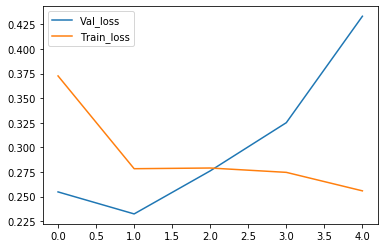

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(history.history['val_loss'],label='Val_loss')
plt.plot(history.history['loss'],label='Train_loss')
plt.legend()
plt.show()
plt.savefig('Loss_figure')

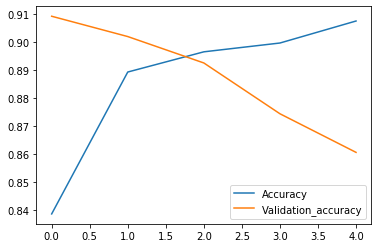

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy_fig")

In [4]:
from tensorflow.keras.models import load_model

In [42]:
model.save('Vgg_19_model.h5')

## Predicting the Output

In [43]:
y_pred=model.predict(test_set)

In [6]:
import numpy as np

In [45]:
y_pred=np.argmaxx(y_pred,axis=1)

In [5]:
def model_predict(model_path,img_path):
    model=load_model(model_path)
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=img/255
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    pred=model.predict(img)
    pred=np.argmax(pred,axis=1)
    if pred==0:
        print("The person is Infected with pneumonia")
    else:
        print("The person is Uninfected")
    return pred    
    
    

In [7]:
model_path='C:/Users/DIPU/Projects/Malaria Detection using CNN/Vgg_19_model.h5'
img_path='C:/Users/DIPU/Projects/Malaria Detection using CNN/C1_thinF_IMG_20150604_105100_cell_53.png'
model_predict(model_path,img_path)

The person is Uninfected


array([1], dtype=int64)